# Домашнее задание №1


Задание присылать на обе почты почты **aleksartamonov@gmail.com**  **dashkov.alexander.om@gmail.com** в виде ссылки на colab

В теме письма указать ***CV_HSE_2021 HW1 <Фамилия Имя>***

soft deadline: 14.02.2021T23:59:00+0300

hard deadline: 21.02.2021T23:59:00+0300

## Теоретический блок

##### Задача 1 (3 балла)

Когда Вы заходите в темную комнату из светлого помещения, то проходит некоторое время, прежде чем Вы станете видеть достаточно хорошо, чтобы различить очертания предметов. Какая из обсуждавшихся на лекции особенностей зрительного восприятия человека объясняет это явление? Какой процесс происходит в зрительной системе?

---

Ответ:

При переходе из светлого помещения в темное человек вначале ничего не видит из-за пониженной возбудимости фоторецепторов и зрительных нейронов. Через некоторое время чувствительность фоторецепторов и зрительных нейронов в темноте постепенно повышается, начинают выявляться контуры предметов, а затем различаются и их детали. Такая адаптация составляет в среднем 30 – 45 минут, и она связана с восстановлением родопсина у человека. Родопсин отвечает за ночное зрение, а при дневном «цветовом зрении» (ярком освещении) он разлагается. 

---

##### Задача 2 (3 балла)

Рассмотрим некоторое цветовое пространство $R_{new}G_{new}B_{new}$, получающееся из исходного RGB по правилу:

$$
R_{new} = a_{11}R+a_{12}G+a_{13}B+a_{14}\\
G_{new} = a_{21}R+a_{22}G+a_{23}B+a_{24}\\
B_{new} = a_{31}R+a_{32}G+a_{33}B+a_{34}
$$

где R, G и B – вещественные числа от 0 до 1. 

Какими свойствами должны обладать коэффициенты $a_{ij}$, чтобы можно было без потерь информации переходить из одного пространства в другое и обратно?
(*) Какими свойствами должны обладать коэффициенты $a_{ij}$ , чтобы вещественные числа $R_{new},G_{new}$ и $B_{new}$ тоже лежали внутри куба со стороной 1 и полностью плотно его заполняли?

---

$$
a_{11} \ \ a_{12} \ \ a_{13}\\
a_{21} \ \ a_{22} \ \ a_{23}\\
a_{31} \ \ a_{32} \ \ a_{33}
$$


должно быть ортогональной матрицей

---

## Практический блок

In [ ]:
import cv2
import matplotlib.pylab as plt
%matplotlib inline

import numpy as np

##### Задача 3 (3 балла)

Загрузите изображение *lena.jpg* в переменную **lena**. Отобразите результат на экран.

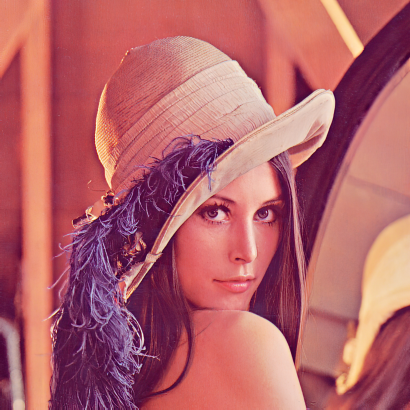

In [ ]:
# загрузка
from google.colab.patches import cv2_imshow
import cv2
lena = cv2.imread("Lenna.png")
# lena = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)

# масштабирование
scale_percent = 20 
width = int(lena.shape[1] * scale_percent / 100 + 1)
height = int(lena.shape[0] * scale_percent / 100 + 1)
dim = (width, height)
lena = cv2.resize(lena, dim, interpolation = cv2.INTER_AREA)
cv2_imshow(lena)

##### Задача 4 (3 балла)

Поменяйте местами левую верхнюю и правую нижнюю четвертинки изображения **lena** и отобразите результат на экран.

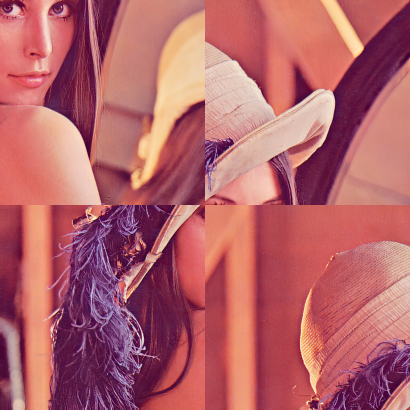

In [ ]:
# части
R_Up = lena[0:width//2, height//2:height]
L_Up = lena[0:width//2, 0:height//2]
R_Low = lena[width//2:width, height//2:height]
L_Low = lena[width//2:width, 0:height//2]

# склейка
Up = np.concatenate((R_Low, R_Up), axis=1)
Bottom = np.concatenate((L_Low, L_Up), axis=1)
new_lena = np.concatenate((Up, Bottom), axis=0)

cv2_imshow(new_lena)

##### Задача 5 (3 балла)

Усредните значения всех трех цветовых каналов **lena** в каждый из каналов итогового изображения **lena_gray_my**.

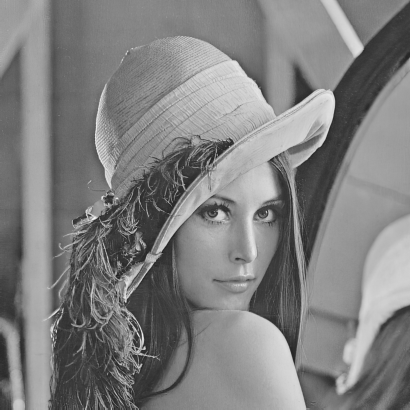

In [ ]:
lena_gray_my = np.mean(lena, axis=2)
cv2_imshow(lena_gray_my)

##### Задача 6 (3 балла)

Переведите исходное цветное изображение **lena** в изображение в градациях серого с помощью функции cvtColor. (**lena_gray_cvt**). Вычислите модуль разности между изображениями **lena_gray_my** и **lena_gray_cvt** и отобразите ее на экране.

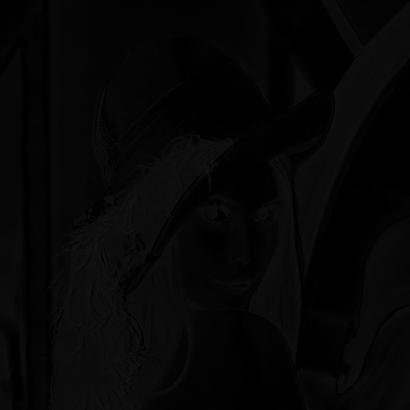

In [ ]:
lena_gray_cvt = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)
# cv2_imshow(lena_gray_cvt)
# print(lena_gray_cvt.shape)

diff = np.abs(lena_gray_cvt - lena_gray_my)
cv2_imshow(diff)


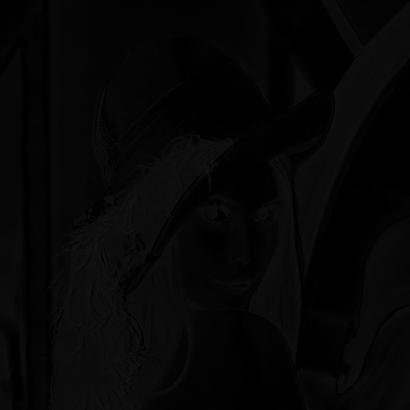

In [ ]:
diff = np.abs(lena_gray_my - lena_gray_cvt)
cv2_imshow(diff)

In [ ]:
print(lena_gray_cvt.dtype, lena_gray_my.dtype)

uint8 float64


In [ ]:
lena_gray_my = lena_gray_my.astype(lena_gray_cvt.dtype)

In [ ]:
print(lena_gray_cvt.dtype, lena_gray_my.dtype)

uint8 uint8


In [ ]:
diff = cv2.absdiff(lena_gray_cvt, lena_gray_my)

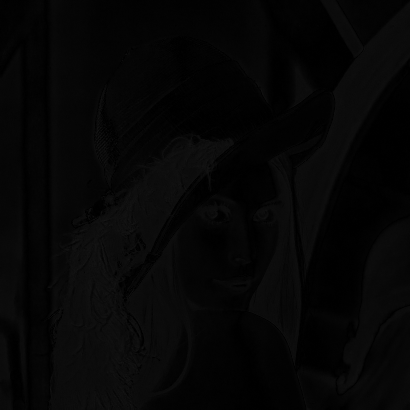

In [ ]:
cv2_imshow(diff)

##### Задача 7 (3 балла)

Переведите исходное изображение **lena** из RGB в HSV. Установите значения S и V в максимум для всех пикселей изображения. Полученное изображение переведите обратно в RGB. Отобразите результат.

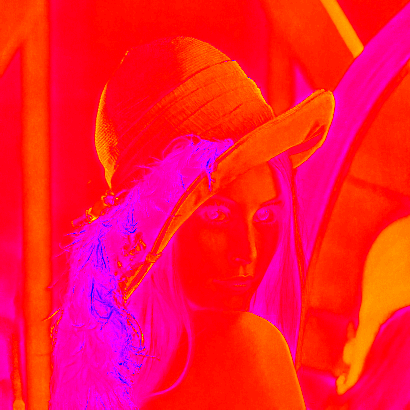

In [ ]:
lena_hsv = cv2.cvtColor(lena, cv2.COLOR_BGR2HSV)
# cv2_imshow(lena_hsv)
# print()

h, s, v = cv2.split(lena_hsv)
s.fill(255)
v.fill(255)
lena_hsv_2 = cv2.merge([h, s, v])
lena_bgr = cv2.cvtColor(lena_hsv_2, cv2.COLOR_HSV2BGR)
cv2_imshow(lena_bgr)

##### Задача 8 (3 балла)
Переведите изображение **lena** в одно из цветовых пространств (cvtColor) с выделенной координатой яркости (HSV, HSL, HSB, CIE Lab), инвертируйте яркостную составляющую, переведите обратно в RGB. Отобразите результат.

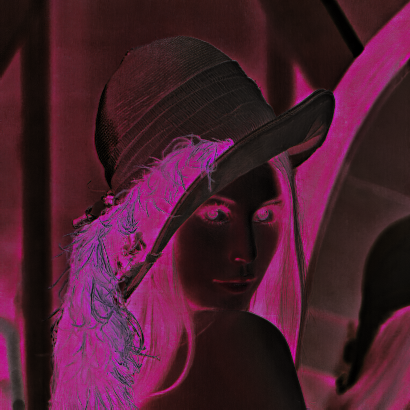

In [ ]:
lena_hsv = cv2.cvtColor(lena, cv2.COLOR_BGR2HSV)
# cv2_imshow(lena_hsv)
# print()

h, s, v = cv2.split(lena_hsv)
v = 255 - v
lena_hsv_2 = cv2.merge([h, s, v])
lena_bgr = cv2.cvtColor(lena_hsv_2, cv2.COLOR_HSV2BGR)
cv2_imshow(lena_bgr)

##### Задача 9 (3 балла)

По цветному изображению **lena** на входе сгенерируйте 6 цветных изображений, полученных путем перестановки значений цветовых каналов r, g и b. исходного изображения. Соберите коллаж $3x2$ и отобразите его на экране. 

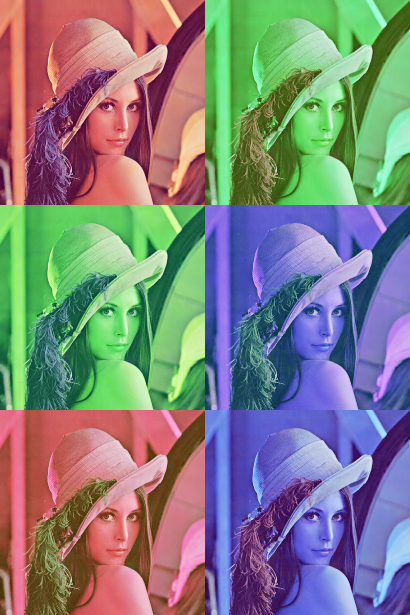

In [ ]:
from itertools import permutations

###
width = int(lena.shape[1] // 2)
height = int(lena.shape[0] // 2)
dim = (width, height)
lena_0 = cv2.resize(lena, dim, interpolation = cv2.INTER_AREA)
###

b, g, r = cv2.split(lena_0)
a = [b, g, r]
all = []

perms = permutations(a)
for perm in perms:
    lena_1 = cv2.merge(perm)
    all.append(lena_1)

new = np.array(all).reshape(205*6, 205*1, 3)

new2 = new[:205*3,:,:]
new3 = new[205*3:,:,:]

new4 = np.concatenate((new2, new3), axis=1)
cv2_imshow(new4)

##### Задача 10 (3 балла)
Переведите изображение **lena** из RGB в CIE Lab при помощи встроенной функции OpenCV. Загрузите исходное иображение еще раз и переведите из RGB в CIE Lab самостоятельно с помощью формул (google it). Сравните полученные изображения, построив разницу между ними. (Должен получится ~0)

In [ ]:
def f(t):
    if t > 0.008856:
        return np.power(t, 1/3)
    return 7.787*t + 16/116


def convert(massiv):

    # delta = 128
    delta = 0
    X, Y, Z = massiv

    if Y > 0.008856:
        L = 116 * np.power(Y, 1/3) - 16
    else:
        L = 903.3 * Y

    a = 500*(f(X) - f(Y)) + delta
    b = 200*(f(Y) - f(Z)) + delta

    #8bit
    L = L * 255/100
    a = a + 128
    b = b + 128

    return np.array([L, a, b])


def gamma_normalize(img):
    img = img.astype(float) / 255
    return np.where(img > 0.04045, ((img + 0.055) / 1.055)**2.4, img / 12.92)

In [ ]:
def to_lab(img):

    # перевод в rgb
    lena_0 = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)

    # scale to 1 0
    lena_1 = gamma_normalize(lena_0)

    # умножение на матрицу
    matrix = np.array([[0.412453, 0.357580, 0.180423],
                       [0.212671, 0.715160, 0.072169],
                       [0.019334, 0.119193, 0.950227]])

    lena_2 = np.array([[matrix @ lena_1[i, j] for j in range(lena_1.shape[1])] for i in range(lena_1.shape[0])])

    # деление на коэф
    lena_2[:,:,0] /= 0.950456
    lena_2[:,:,2] /= 1.088754

    # отображение в LAB
    lena_3 = np.array([[convert(lena_2[i, j]) for j in range(lena_2.shape[1])] for i in range(lena_2.shape[0])])
    
    return lena_3

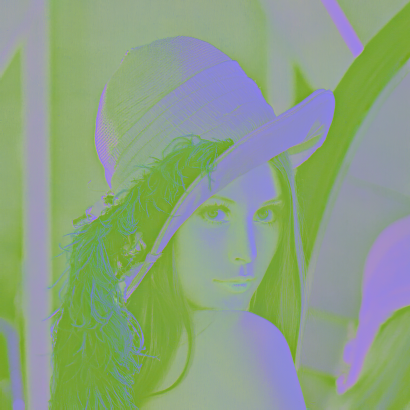

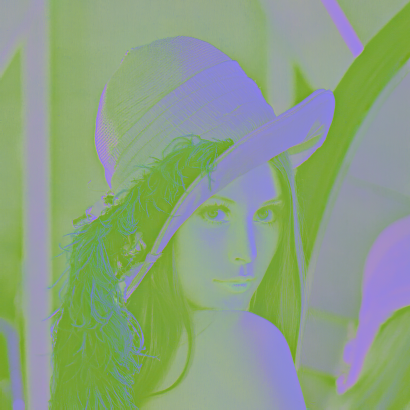

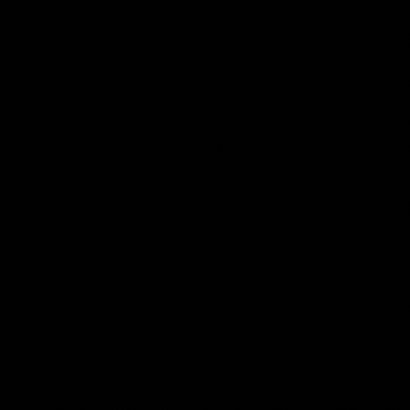

In [ ]:
lena_CIELAB_CV = cv2.cvtColor(lena, cv2.COLOR_BGR2Lab)
lena_CIELAB_Mine = to_lab(lena).astype(lena_CIELAB_CV.dtype)
cv2_imshow(lena_CIELAB_CV)
print()
cv2_imshow(lena_CIELAB_Mine)
print()

diff = cv2.absdiff(lena_CIELAB_CV, lena_CIELAB_Mine)
cv2_imshow(diff)
# print(diff)